# CEE 598: Uncertainty Quantification
## Assignment Two
### Noah Garfinkle (garfink2@illinois edu)
### 13 February 2020

# Imports and Setup

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Problem 1

Using inverse transform sampling, write a code that can be used to generate n samples from the Cauchy distribution.  The Cauchy PDF and CDF are given by

$$
f_X\left(x\right)=\frac{1}{\pi\gamma\left[1+\left(\frac{x-x_0}{\gamma}\right)^2\right]}
$$

$$
F_X\left(x\right)=\frac{1}{\pi}\arctan{\left(\frac{x-x_0}{\gamma}\right)}+\frac{1}{2}
$$

Where $x_o$ is the median, and $\gamma$ is a scale factor.  The inputs to your code should be the number of samples $n$, and the numerical values for $x_0$ and $\gamma$.  Compute the generated samples with the target PDF, for a particular choice of $x_0$ and $\gamma$ (you’re free to choose any value).  You can use histogram plots or any available kernel density estimator codes.  Discuss your results.

In [5]:
def pdf(x,x0=0,γ=2):
    f_denom = np.pi * γ * (1 + np.power((x-x0)/γ,2))
    f = 1.0 / f_denom
    return f

In [10]:
def cdf(x,x0=0,γ=2):
    F = (1/np.pi) * np.arctan((x-x0)/γ) + 1/2
    return F

In [25]:
def testPDF(x,x0=0,γ=2):
    f = stats.cauchy.pdf(x=x, loc=x0, scale=γ)
    return f

In [30]:
def testCDF(x,x0=0,γ=2):
    F = stats.cauchy.cdf(x=x, loc=x0, scale=γ)
    return F

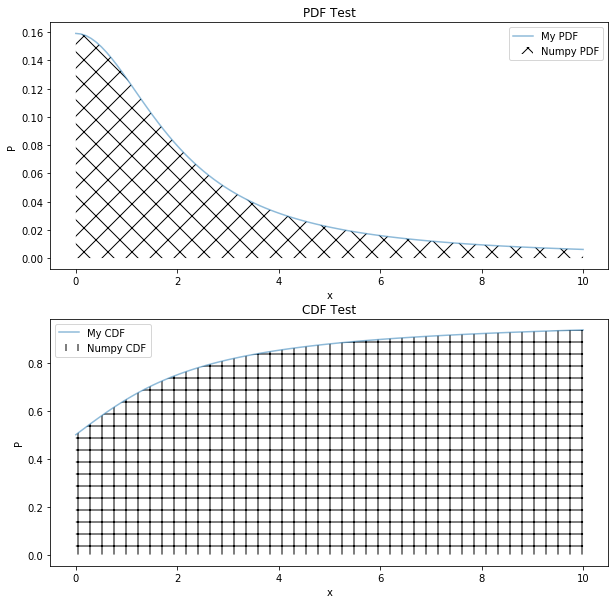

In [60]:
xs = np.linspace(0,10,100)
fs = [pdf(x) for x in xs]
testfs = [testPDF(x) for x in xs]

Fs = [cdf(x) for x in xs]
testFs = [testCDF(x) for x in xs]

fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(xs,fs,label="My PDF", alpha=0.5)
ax[0].fill_between(xs,testfs,hatch='x',facecolor="white",label="Numpy PDF")

ax[1].plot(xs,Fs,label="My CDF", alpha=0.5)
ax[1].fill_between(xs,testFs,hatch='+',facecolor="white",label="Numpy CDF",alpha=0.5)

ax[0].set_title("PDF Test")
ax[1].set_title("CDF Test")

ax[0].set_xlabel("x")
ax[0].set_ylabel("P")

ax[1].set_xlabel("x")
ax[1].set_ylabel("P")

ax[0].legend()
ax[1].legend()

Solve for the inverse of the CDF

$$
y=\frac{1}{\pi}\arctan{\left(\frac{x-x_0}{\gamma}\right)}+\frac{1}{2}
$$
$$
y-\frac{1}{2}=\frac{1}{\pi}\arctan{\left(\frac{x-x_0}{\gamma}\right)}
$$
$$
\pi y-\frac{1}{2}\pi=\arctan{\left(\frac{x-x_0}{\gamma}\right)}
$$
$$
\tan{\left(y\pi-\frac{1}{2}\pi\right)}=\frac{x-x_0}{\gamma}
$$
$$
\gamma tan{\left(y\pi-\frac{1}{2}\pi\right)}=x-x_0
$$
$$
x=\gamma tan{\left(y\pi-\frac{1}{2}\pi\right)}+x_0\rightarrow Inverse\ CDF
$$

In [64]:
def inverseCDF(P,x0=0.0,γ=2.0):
    x = γ*np.tan(P*np.pi-(1/2)*np.pi) + x0
    return x

In [69]:
Ps = np.linspace(0,1,100)
inverseXs = [inverseCDF(P) for P in Ps]

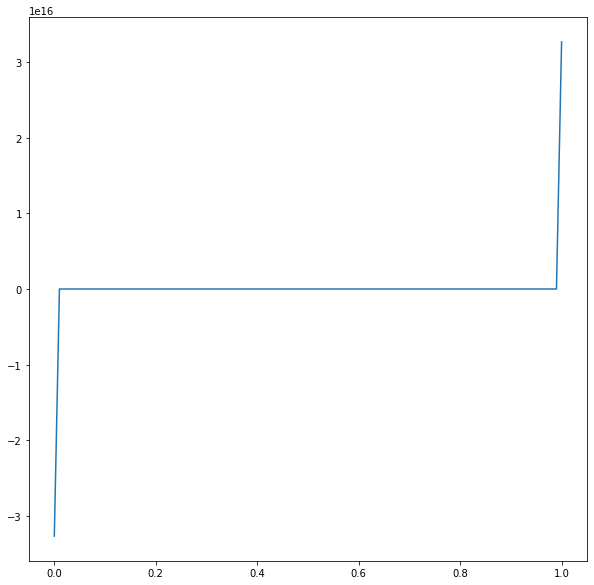

In [72]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Ps,inverseXs)

In [80]:
np.random.uniform()

0.607504311772279

In [87]:
def cauchy(n,x0=0,γ=2):
    inverseCDFXs = []
    for i in range(0,n):
        u = np.random.uniform()
        inverseCDFXs.append(inverseCDF(u,x0,γ))
    return inverseCDFXs

In [88]:
c = Cauchy(100)

In [90]:
np.random.standard_cauchy(0,2)

TypeError: standard_cauchy() takes at most 1 positional argument (2 given)

# Problem 2

You are asked to provide a random number generator from the Gamma PDF, $Gamma(x;2,2)$, given by

$$
f_X\left(x\right)=\frac{1}{4}xe^{-\frac{x}{2}}
$$

You are supposed to use rejection sampling, and choose the envelope PDF, i.e. $cg(x)$, to be a scaled version of Cauchy PDF (given in Problem 1).

## Problem 2.1

Show how you modify your Cauchy PDF to become an upper bound for the Gamma PDF everywhere.  The parameters that you can vary so that this upper bound condition is satisfied are $x_0$, $\gamma$, and also $c$.  There are several combinations of these parameters that can make the Cauchy PDF an envelope distribution.  Discussion how some of these conditions can be more favorable than others.

## Problem 2.2

Write an acceptance-rejection sampling code that can be used to generate $n$ samples from the given Gamma PDF.  Use the code you wrote for Problem 1 to draw samples from $g_X(x)$ within your rejection sampling algorithm.


## Problem 2.3

Compare the generated samples with the targeted PDF.  You can use histogram plots or available kernel density estimator codes.  Discuss your results.
